<a href="https://colab.research.google.com/github/kayal466/Mongodb-/blob/main/Mobile%20Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

DATA PREPROCESSING

In [67]:
data = pd.read_csv("/Flipkart_Amazon Mobile Reviews.csv")

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    23777 non-null  int64 
 1   Review-Title  23775 non-null  object
 2   rating        23777 non-null  object
 3   Review-Body   23160 non-null  object
 4   Product Name  23777 non-null  object
dtypes: int64(1), object(4)
memory usage: 928.9+ KB


In [69]:
data.describe()

,Unnamed: 0
count,23777.000000
mean,11888.000000
std,6863.973011
min,0.000000
25%,5944.000000
50%,11888.000000
75%,17832.000000
max,23776.000000


In [70]:
data.shape

(23777, 5)

In [71]:
data.isnull().sum()

Unnamed: 0        0
Review-Title      2
rating            0
Review-Body     617
Product Name      0
dtype: int64

In [72]:
data.dropna()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...,...
23772,23772,Batten in this rangee,4.0 out of 5 stars,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,23773,Good mobile,4.0 out of 5 stars,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,23774,Good camera,5.0 out of 5 stars,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,23775,Warest mobile,1.0 out of 5 stars,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


I HAVE DROPPED THE NULL VALUES BECAUSE THE VALUES IN LESS.

**DATA** **PROCESSING**

In [73]:
data["Review-Body"] = data["Review-Body"].str.lower()
data["Review-Body"].value_counts()

good                                                                                                                    1016
nice                                                                                                                     348
good product                                                                                                             189
the media could not be loaded.                                                                                           161
ok                                                                                                                       149
                                                                                                                        ... 
battery power is good                                                                                                      1
good product with longer battery life all day out no problems                                                              1


In [74]:
#data["Review-Title"] = data["Review-Title"].str.lower()
data["Review-Title"].value_counts()

Good                                                                   1295
Nice                                                                    466
Value for money                                                         240
Good product                                                            230
Nice phone                                                              176
                                                                       ... 
sometime calls not connecting                                             1
It was a good product the sound and battery quality  was  awesome 👌       1
Good and price is reasonable because of 128 GB storage                    1
The screen should have gorrila glass                                      1
Good phone complicated UI.                                                1
Name: Review-Title, Length: 15040, dtype: int64

In [75]:
#data["Product Name"]=
data["Product Name"].value_counts()

Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           4460
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              4330
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 3768
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)    3570
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)            2724
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)      2166
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)      1419
Samsung Galaxy M32                                            1340
Name: Product Name, dtype: int64

In [76]:
data["Product Name"].unique().sum()

'OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)Samsung Galaxy M32vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)'

In [77]:
data["rating"].value_counts()

5.0 out of 5 stars    9399
1.0 out of 5 stars    5231
4.0 out of 5 stars    4886
3.0 out of 5 stars    2703
2.0 out of 5 stars    1558
Name: rating, dtype: int64

APPLYING NLP FOR THE REVIEWS

In [78]:
df = data["Review-Body"]

In [79]:
df

0                                             hang problem
1        i'm writing this review after using 3days !!!b...
2        camera is so good n very fast phone back look ...
3        the media could not be loaded.\n              ...
4        i got my delivery on 23 feb when i unboxed the...
                               ...                        
23772    must he bhai iss range me bas cemra thoda sa s...
23773                                         good product
23774                                                 good
23775    don't buy this mobile phone money weast screen...
23776    phone is good . camera not upto the mark. ui i...
Name: Review-Body, Length: 23777, dtype: object

In [80]:
df.dropna()

0                                             hang problem
1        i'm writing this review after using 3days !!!b...
2        camera is so good n very fast phone back look ...
3        the media could not be loaded.\n              ...
4        i got my delivery on 23 feb when i unboxed the...
                               ...                        
23772    must he bhai iss range me bas cemra thoda sa s...
23773                                         good product
23774                                                 good
23775    don't buy this mobile phone money weast screen...
23776    phone is good . camera not upto the mark. ui i...
Name: Review-Body, Length: 23160, dtype: object

IMPORTING ESSENTIAL NLP LIBIRARY

In [81]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '',text)
  text = re.sub('https?://\S+www\.\S+', '',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
  text = re.sub('\n', '',text)
  text = re.sub('\w*\d\w*','',text)
  text = [word for word in text.split(' ')if word not in stopword]
  text = " ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text
data["Review-Body"]= data["Review-Body"].apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
data["Review-Body"]

0                                             hang problem
1        im write review use  honest normal android pho...
2        camera good n fast phone back look awesomewith...
3        media could load                 it averag pro...
4        got deliveri  feb unbox phone display damag re...
                               ...                        
23772        must bhai iss rang bas cemra thoda sa shi nhi
23773                                         good product
23774                                                 good
23775    dont buy mobil phone money weast screen tach p...
23776              phone good  camera upto mark ui complic
Name: Review-Body, Length: 23777, dtype: object

WE HAVE GOT THE CLEANED REVIEWS

In [83]:
Ratings = data["rating"].value_counts()
numbers = Ratings.index
quantity = Ratings.values
import plotly.express as px
figure = px.pie(data,values = quantity,names = numbers,hole = 0.5)
figure.show()

5 star - 39.5%
4 star - 20.5%
3 star - 11.4%
2 star - 6.55%
1 star - 22%    **Only 39.5 % of the people has given the 5 star rating for the mobile phones.**

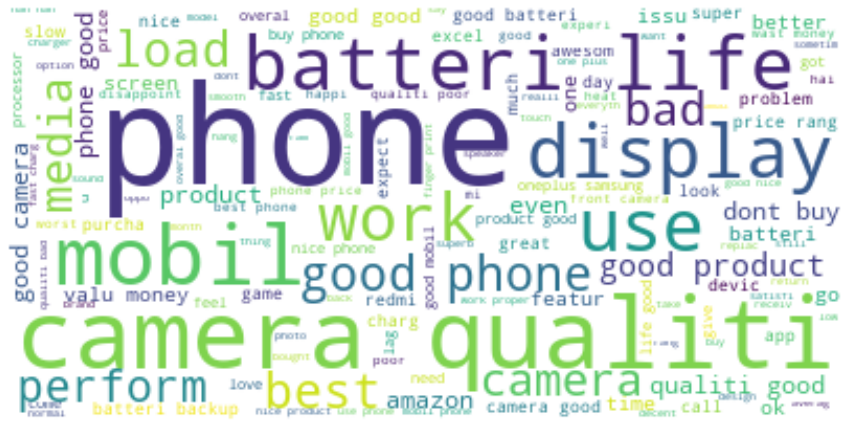

In [84]:
text = " ".join(i for i in df)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()



Finding the Positive and Negative values

In [85]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"]= [sentiments.polarity_scores(i)["pos"]for i in df]
data["Negative"]= [sentiments.polarity_scores(i)["neg"]for i in df]
data["Neutral"]= [sentiments.polarity_scores(i)["neu"]for i in df]
data =data[["Review-Body","Positive","Negative","Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                         Review-Body  Positive  Negative  \
0                                       hang problem     0.000     0.730   
1  im write review use  honest normal android pho...     0.154     0.093   
2  camera good n fast phone back look awesomewith...     0.199     0.000   
3  media could load                 it averag pro...     0.263     0.057   
4  got deliveri  feb unbox phone display damag re...     0.187     0.000   

   Neutral  
0    0.270  
1    0.753  
2    0.801  
3    0.680  
4    0.813  


In [86]:
x = sum(data["Positive"])
y = sum(data["Negative"])
Z = sum(data["Neutral"])
def sentiment_score(a, b, c):
  if (a>b)and (a>c):
    print("Positive")
  elif(b>a) and (b>c):
    print("Negative")
  else:
    print("Neutral")
sentiment_score(x, y, Z)

Neutral


**Conclusion**

In [87]:
print("Positive:",x)
print("Negative:",y)
print("Neutral:",Z)

Positive: 8102.302999999926
Negative: 1808.5739999999969
Neutral: 13778.13999999981


We have founded 8102 positive reviews, 1808 Negative reviews and 13778 neutral reviews. Among this majority of neutral reviews only found.
